# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# load the dataset

In [2]:
df=pd.read_csv(r"diabetes.csv")

# Printing first five rows in the dataset 

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Printing last five rows in the dataset

In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Finding the rows and columns of the dataset

In [5]:
df.shape

(768, 9)

<AxesSubplot:>

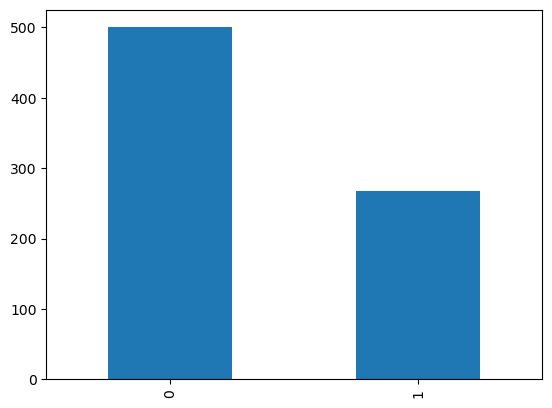

In [6]:
df['Outcome'].value_counts().plot.bar()

# Column names

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Check duplicate values present in the dataset

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

# Statistical data 

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Information of the dataset to know if there is null values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Here in the data it shows there is no null values but there are many zeros in the dataset.
## list number of zeros in  each column

In [12]:
 print("No of zero in glucose",df[df['Glucose']==0].shape[0]) 
 print("No of zero in BloodPressure",df[df['BloodPressure']==0].shape[0])
 print("No of zero in SkinThickness",df[df['SkinThickness']==0].shape[0])
 print("No of zero in Insulin",df[df['Insulin']==0].shape[0])
 print("No of zero in BMI",df[df['BMI']==0].shape[0])

No of zero in glucose 5
No of zero in BloodPressure 35
No of zero in SkinThickness 227
No of zero in Insulin 374
No of zero in BMI 11


In [13]:
pima_all = df.loc[(df['BMI'] != 0) & (df['Insulin'] != 0) & (df['BloodPressure'] != 0) & (df['Glucose'] != 0)]

In [14]:
pima_all.shape

(392, 9)

In [15]:
print(pima_all)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0      181             88             44      510  43.3   
755            1      128             88             39      110  36.5   
760            2       88             58             26       16  28.4   
763           10      101             76             48      180  32.9   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
4                  

In [16]:
pima_all.min()

Pregnancies                  0.000
Glucose                     56.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.085
Age                         21.000
Outcome                      0.000
dtype: float64

# Check if there is a zero in a min value using describe()

In [17]:
pima_all.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
pima_all['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

# Exploratory Data Analysis

## Univariant Analysis:

In [19]:
numeric_features = [feature for feature in pima_all.columns if pima_all[feature].dtype != 'O']

In [20]:
numeric_features 

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

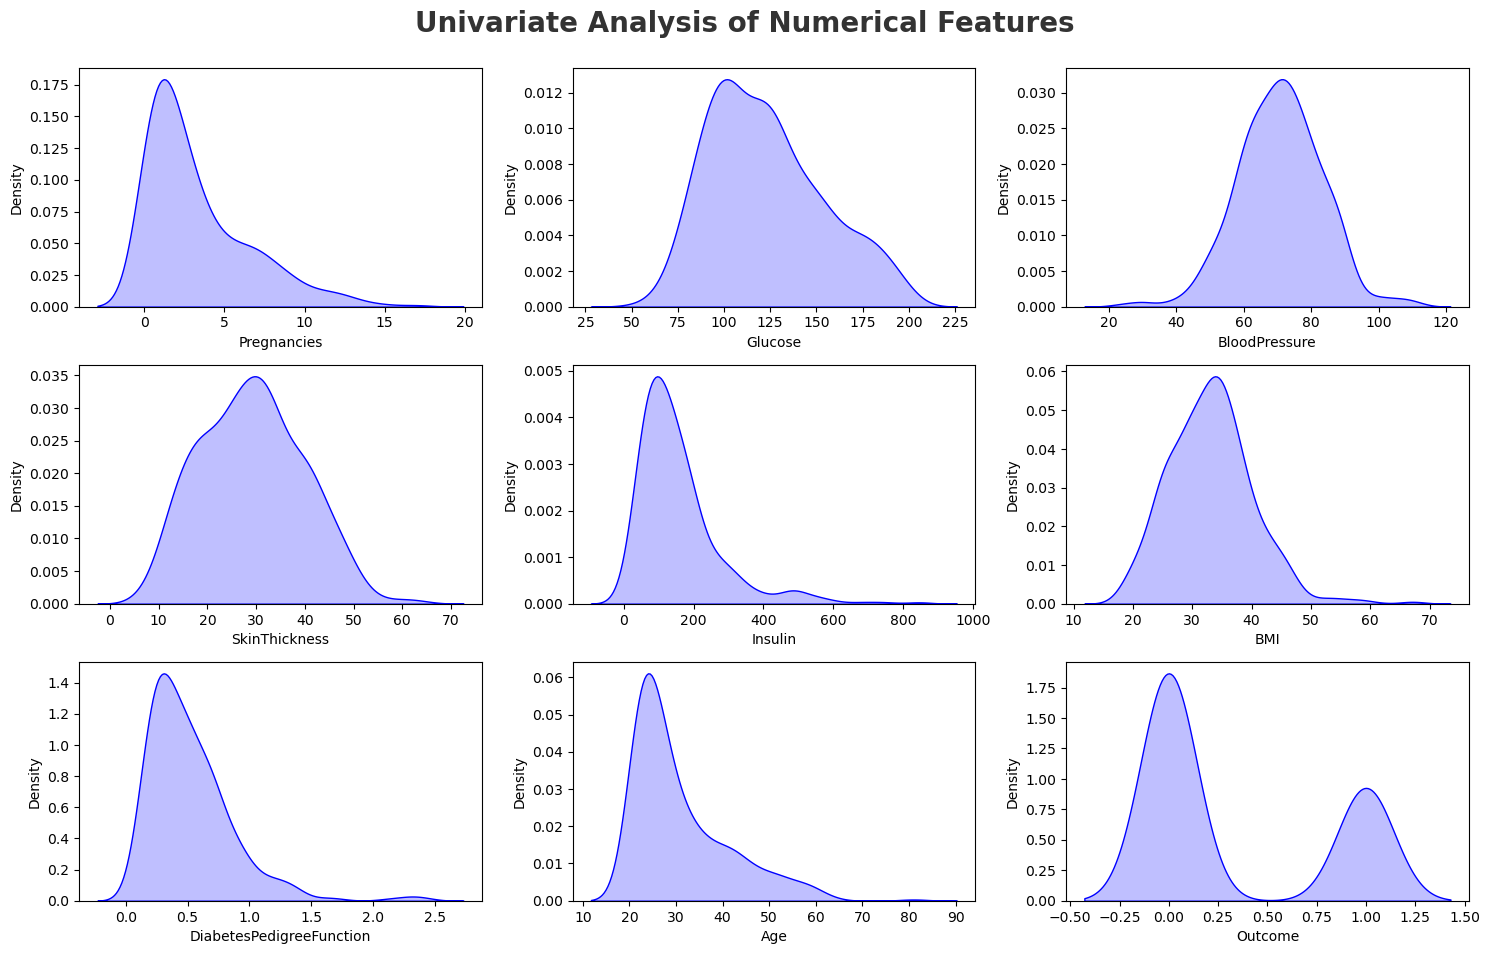

In [21]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)


for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=pima_all[numeric_features[i]],fill=True, color='b',warn_singular=False)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Scattter plot for each column with Glucose

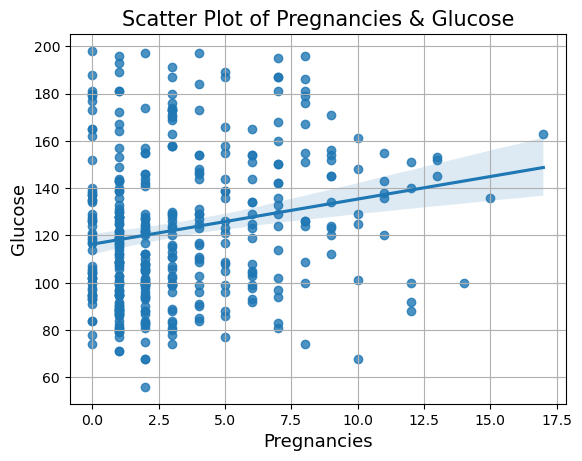

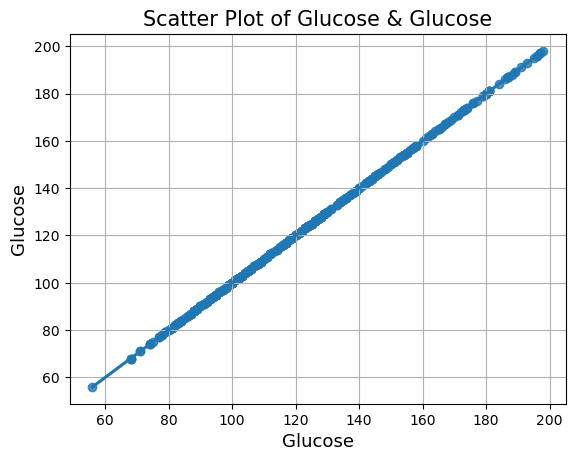

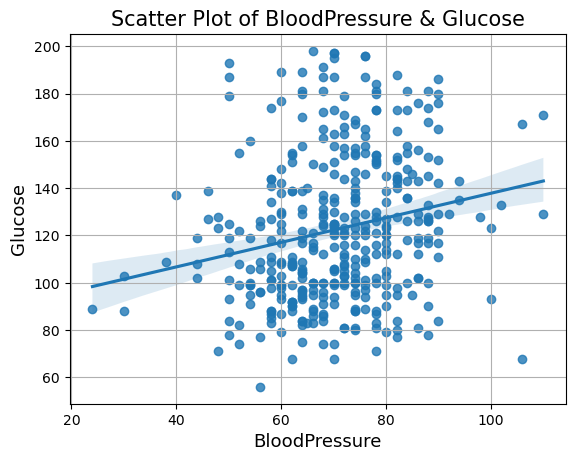

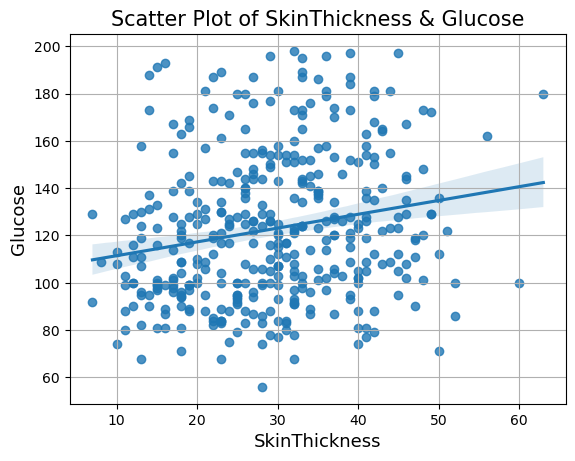

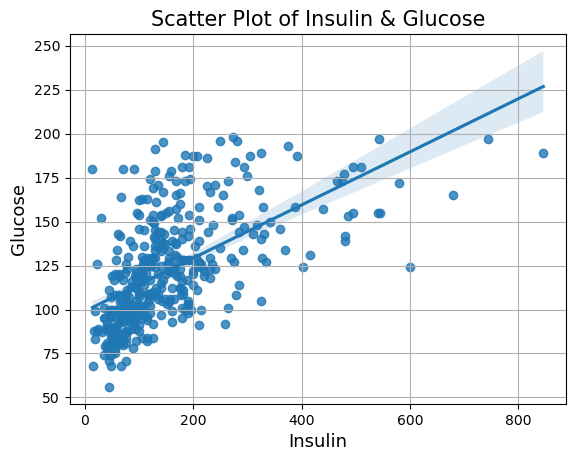

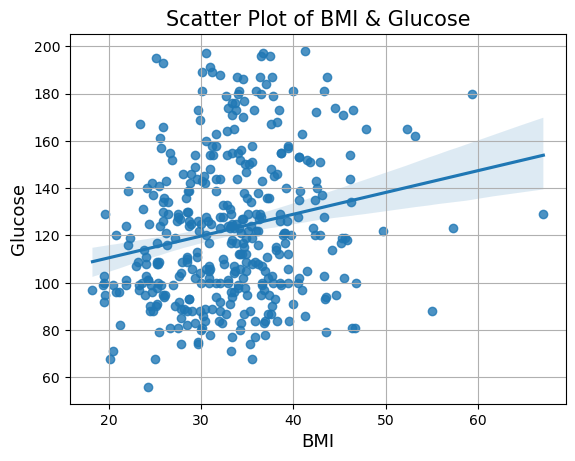

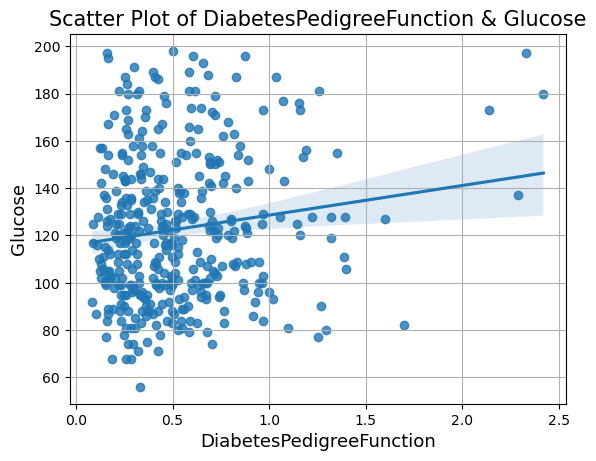

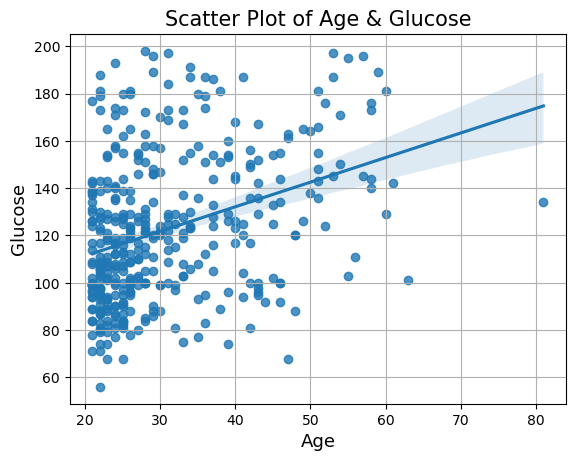

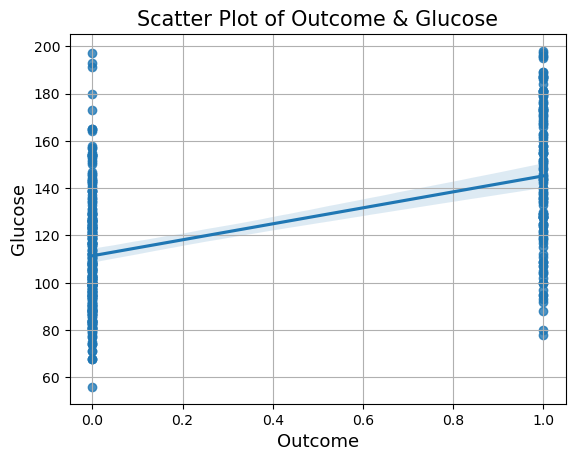

In [22]:

x_axis = numeric_features
y = "Glucose"

for col in x_axis:
     sns.regplot(x = col, y = y, data = pima_all)
     plt.xlabel(col, fontsize = 13)
     plt.ylabel(y, fontsize = 13)
     plt.title("Scatter Plot of " + col + " & " + y, fontsize = 15)
     plt.grid()
     plt.show()

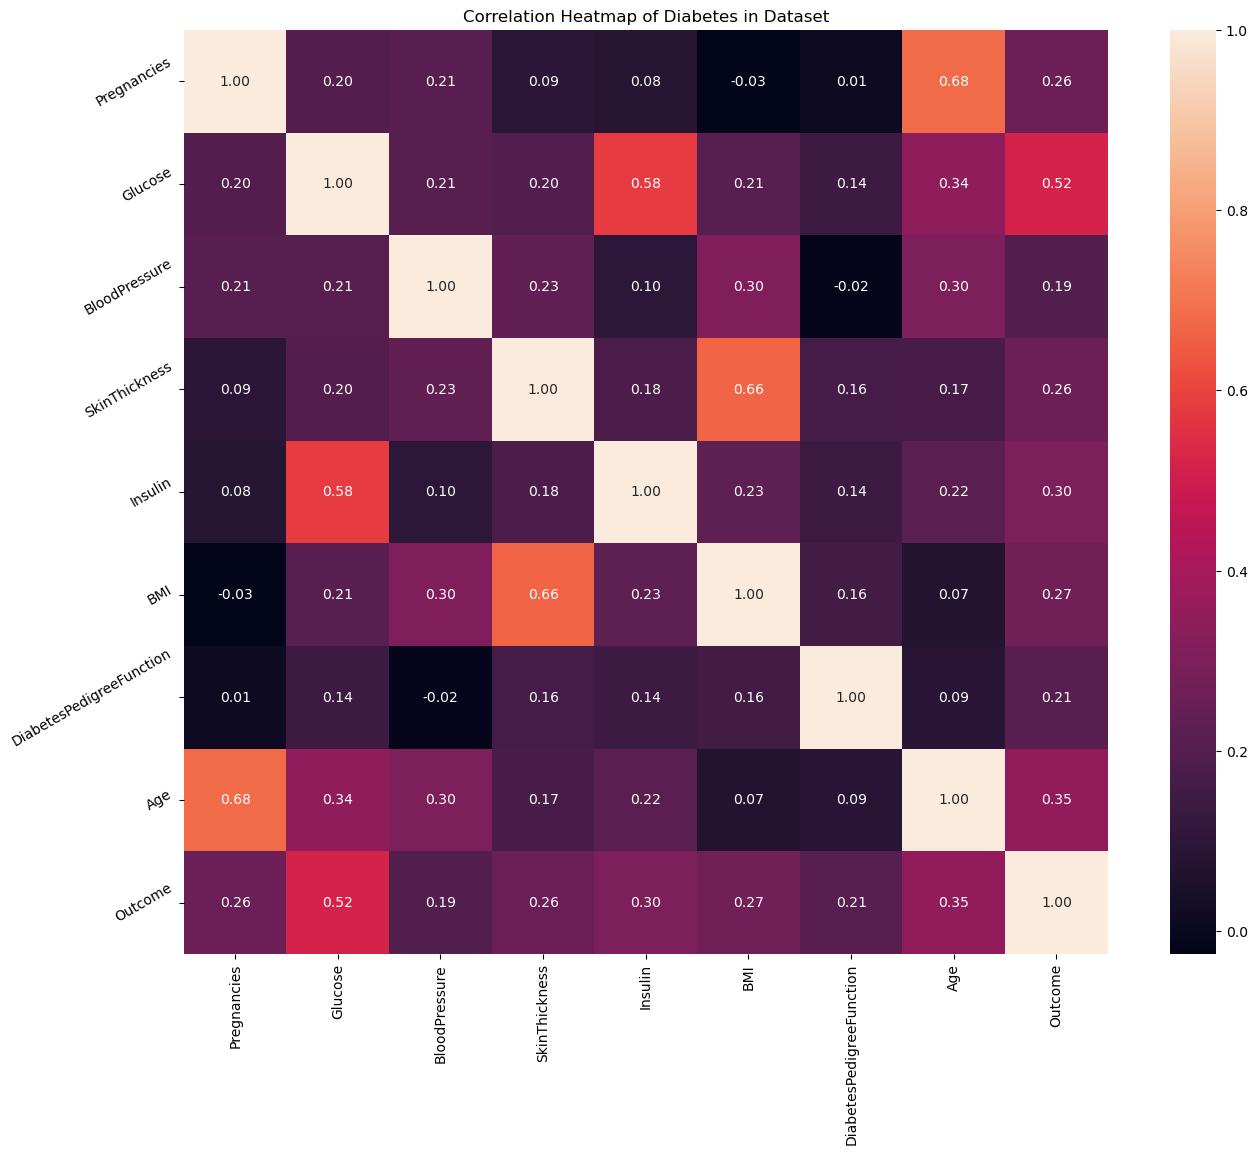

In [23]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Diabetes in Dataset')
ax = sns.heatmap(pima_all.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

### Percentage of Affected and Non Affected

In [24]:
percentage=pima_all.Outcome.value_counts(normalize=True)*100
percentage

0    66.836735
1    33.163265
Name: Outcome, dtype: float64

## Plotting PieChart

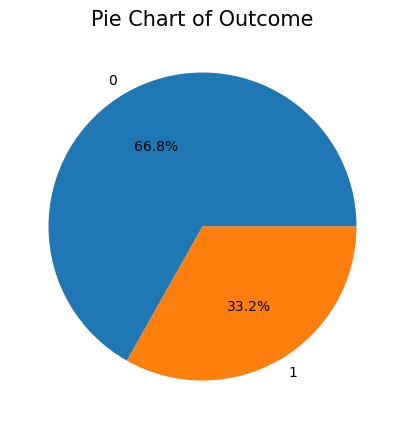

In [25]:

classeslabels = ["0", "1"]
plt.figure(figsize =(15, 5))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Pie Chart of Outcome", fontsize = 15)
plt.show()

# Separate the independent and dependent variables

In [26]:
x=pima_all.drop(["Outcome"],axis=1)
y=pima_all["Outcome"]
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0      181             88             44      510  43.3   
755            1      128             88             39      110  36.5   
760            2       88             58             26       16  28.4   
763           10      101             76             48      180  32.9   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  
3                       0.167   21  
4                       2.288   33  


In [27]:
print(y)

3      0
4      1
6      1
8      1
13     1
      ..
753    1
755    1
760    0
763    0
765    0
Name: Outcome, Length: 392, dtype: int64


# Data Standardization

In [28]:
scaler=StandardScaler()

In [29]:
scaler.fit(x)

StandardScaler()

In [30]:
standardized_data = scaler.transform(x)

In [31]:
print(standardized_data)

[[-0.7174265  -1.09104581 -0.37365481 ... -0.710421   -1.03187632
  -0.9682991 ]
 [-1.02921274  0.46631407 -2.45696436 ...  1.42673006  5.11511079
   0.2095853 ]
 [-0.09385402 -1.44794079 -1.65569146 ... -0.29723846 -0.79712575
  -0.47751393]
 ...
 [-0.40564026 -1.12349081 -1.01467313 ... -0.66767798  0.70411863
  -0.87014206]
 [ 2.08864966 -0.70170584  0.42761809 ... -0.02653266 -1.0202837
   3.15429628]
 [ 0.52971846 -0.05280589  0.10710893 ... -0.9811268  -0.80582021
  -0.0848858 ]]


In [32]:
x=standardized_data
print(x)
print(y)

[[-0.7174265  -1.09104581 -0.37365481 ... -0.710421   -1.03187632
  -0.9682991 ]
 [-1.02921274  0.46631407 -2.45696436 ...  1.42673006  5.11511079
   0.2095853 ]
 [-0.09385402 -1.44794079 -1.65569146 ... -0.29723846 -0.79712575
  -0.47751393]
 ...
 [-0.40564026 -1.12349081 -1.01467313 ... -0.66767798  0.70411863
  -0.87014206]
 [ 2.08864966 -0.70170584  0.42761809 ... -0.02653266 -1.0202837
   3.15429628]
 [ 0.52971846 -0.05280589  0.10710893 ... -0.9811268  -0.80582021
  -0.0848858 ]]
3      0
4      1
6      1
8      1
13     1
      ..
753    1
755    1
760    0
763    0
765    0
Name: Outcome, Length: 392, dtype: int64


## Split the Data into Train and Test Data 
## 80% for Training data and 20% for Test Data

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,stratify=y ,random_state=2)

## Printing the dimension of train and test data

In [34]:
print(x.shape, x_train.shape, x_test.shape)

(392, 8) (313, 8) (79, 8)


## Logistic Regression

In [35]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [36]:
predictions1=model.predict(x_train)
print(predictions1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0]


In [37]:
predictions=model.predict(x_test)
print(predictions)

[1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1]


<AxesSubplot:>

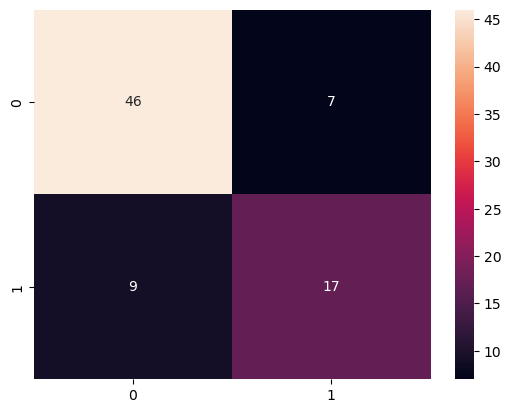

In [38]:
cm=confusion_matrix(y_test,predictions)
cm
sns.heatmap(cm,annot=True)


## Accuracy Score For Logistic Regression

In [39]:
accuracy=accuracy_score(predictions1,y_train)
print(accuracy)

0.7763578274760383


In [40]:
accuracy=accuracy_score(predictions,y_test)
print(accuracy)

0.7974683544303798


## Support Vector Machine

In [41]:
classifier = svm.SVC(kernel = 'linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [42]:
predictions1=classifier.predict(x_train)
print(predictions1)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0]


In [43]:
predictions=classifier.predict(x_test)
print(predictions)

[1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1]


## Accuracy Score for SVM

In [44]:
accuracy=accuracy_score(predictions1,y_train)
print(accuracy)

0.7891373801916933


In [45]:
accuracy=accuracy_score(predictions,y_test)
print(accuracy)

0.8227848101265823


##  Checking our model by giving input

In [46]:
input_data = (7,106,92,18,0,22.7,0.235,48)
# Converting input_data to numpyarray
data_to_np_array = np.asarray(input_data)

#Reshape the array as we are predicting for one instance
input_data_reshaped = data_to_np_array.reshape(1, -1)

In [47]:
std_data = scaler.transform(input_data_reshaped)
std_data

C:\Users\acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.15329094, -0.53948085,  1.70965473, -1.0611641 , -1.31482105,
        -1.47979538, -0.83480177,  1.68194079]])

## Prediction of SVM

In [48]:
prediction = classifier.predict(std_data)
prediction

array([0], dtype=int64)

## Prediction of Logistic Regression

In [49]:
prediction = model.predict(std_data)
prediction

array([0], dtype=int64)

<AxesSubplot:>

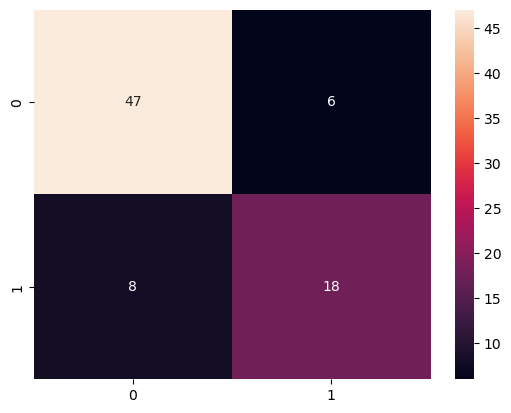

In [50]:
cm=confusion_matrix(y_test,predictions)
cm
sns.heatmap(cm,annot=True)
